In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Display the first few rows and dataset summary head
print(data.head())

          Type    Status Last Updated     Nationality 2017 2018 2019 2020  \
0  Citizenship  Received   31/08/2024     Afghanistan   84  101   95  116   
1  Citizenship  Received   31/08/2024   Åland Islands    0    0    0    0   
2  Citizenship  Received   31/08/2024         Albania   54   63   50   71   
3  Citizenship  Received   31/08/2024         Algeria   54   70   51   68   
4  Citizenship  Received   31/08/2024  American Samoa    0    0    0    0   

  2021 2022 2023 2024  
0  158  263  286   80  
1    0    0    0    0  
2   61  105  144   37  
3   61   80   99   29  
4    0    0    0    0  


In [141]:
# Display the first few rows and dataset summary info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          500 non-null    object
 1   Status        500 non-null    object
 2   Last Updated  500 non-null    object
 3   Nationality   500 non-null    object
 4   2017          500 non-null    object
 5   2018          500 non-null    object
 6   2019          500 non-null    object
 7   2020          500 non-null    object
 8   2021          500 non-null    object
 9   2022          500 non-null    object
 10  2023          500 non-null    object
 11  2024          500 non-null    object
dtypes: object(12)
memory usage: 47.0+ KB
None


In [142]:
# Check for missing values
print(data.isnull().sum())

Type            0
Status          0
Last Updated    0
Nationality     0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
2024            0
dtype: int64


In [143]:
# Filter data for "Received" and "Issued"
received_data = data[data['Status'] == 'Received']
issued_data = data[data['Status'] == 'Issued']

print(received_data.head())
print(issued_data.head())

          Type    Status Last Updated     Nationality 2017 2018 2019 2020  \
0  Citizenship  Received   31/08/2024     Afghanistan   84  101   95  116   
1  Citizenship  Received   31/08/2024   Åland Islands    0    0    0    0   
2  Citizenship  Received   31/08/2024         Albania   54   63   50   71   
3  Citizenship  Received   31/08/2024         Algeria   54   70   51   68   
4  Citizenship  Received   31/08/2024  American Samoa    0    0    0    0   

  2021 2022 2023 2024  
0  158  263  286   80  
1    0    0    0    0  
2   61  105  144   37  
3   61   80   99   29  
4    0    0    0    0  
            Type  Status Last Updated     Nationality 2017 2018 2019 2020  \
250  Citizenship  Issued   31/08/2024     Afghanistan   39   36   15   25   
251  Citizenship  Issued   31/08/2024   Åland Islands    0    0    0    0   
252  Citizenship  Issued   31/08/2024         Albania   14   26   13   25   
253  Citizenship  Issued   31/08/2024         Algeria   20   25    8    8   
254  Cit

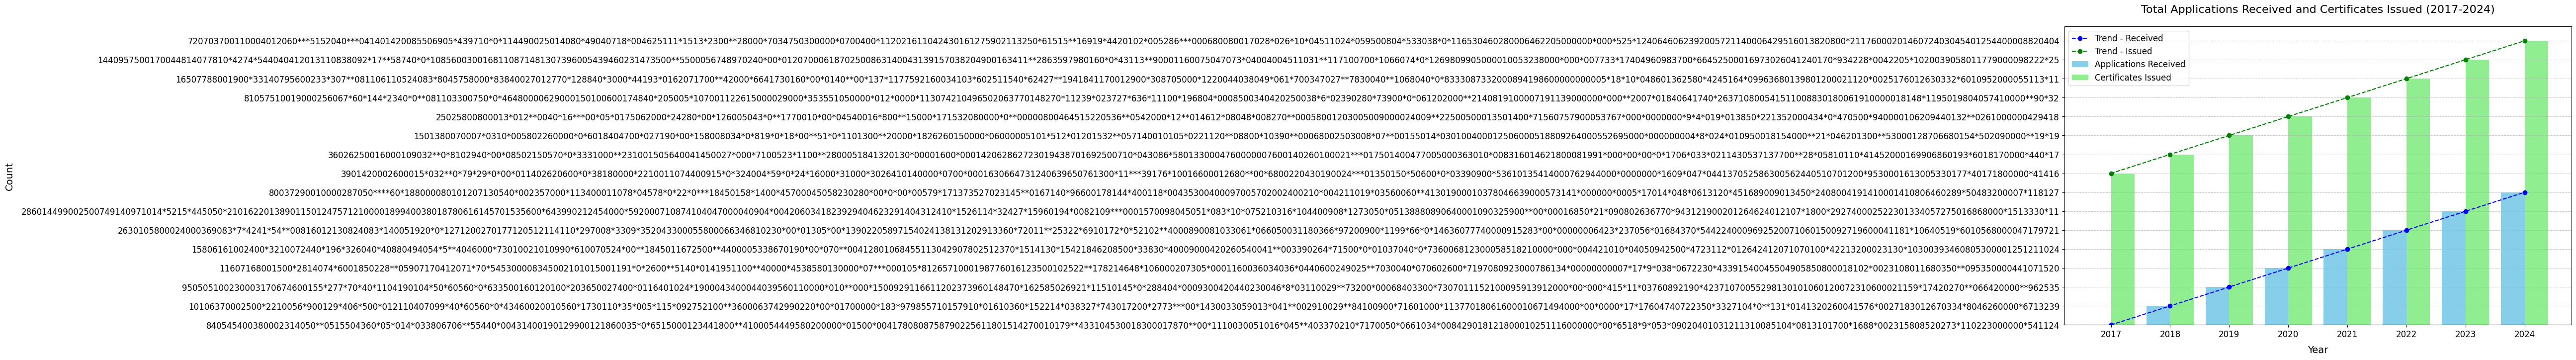

In [144]:
# Summarize total applications received and issued by year
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

total_received_by_year = received_data[years].sum()
total_issued_by_year = issued_data[years].sum()

# Create a DataFrame for visualization
summary_df = pd.DataFrame({
    'Year': years,
    'Total Received': total_received_by_year.values,
    'Total Issued': total_issued_by_year.values
})

# Convert 'Year' to numeric for accurate plotting
summary_df['Year'] = summary_df['Year'].astype(int)

# Plot the data with adjusted figure size and margins
plt.figure(figsize=(12, 8))  # Increase the figure size

# Bar chart for total received
plt.bar(summary_df['Year'] - 0.2, summary_df['Total Received'], width=0.4, label='Applications Received', color='skyblue')

# Bar chart for total issued
plt.bar(summary_df['Year'] + 0.2, summary_df['Total Issued'], width=0.4, label='Certificates Issued', color='lightgreen')

# Add a line plot to highlight trends
plt.plot(summary_df['Year'], summary_df['Total Received'], marker='o', color='blue', linestyle='--', label='Trend - Received')
plt.plot(summary_df['Year'], summary_df['Total Issued'], marker='o', color='green', linestyle='--', label='Trend - Issued')

# Add labels, title, and legend
plt.title('Total Applications Received and Certificates Issued (2017-2024)', fontsize=16, pad=20)  # Increase font size and padding
plt.xlabel('Year', fontsize=14, labelpad=10)  # Add padding
plt.ylabel('Count', fontsize=14, labelpad=10)  # Add padding
plt.xticks(summary_df['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout explicitly
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15)  # Custom margins

# Show the plot
plt.show()


In [145]:
# Create a proper copy of the DataFrame to avoid the warning
received_data = received_data.copy()

# Ensure that the 'years' columns are numeric
received_data[years] = received_data[years].apply(pd.to_numeric, errors='coerce')

# Create a 'Total' column by summing across the specified year columns
received_data['Total'] = received_data[years].sum(axis=1)

# Use nlargest to find the top 5 nationalities
top_nationalities = received_data.nlargest(5, 'Total')

print("Top 5 Nationalities by Total Applications Received:")
print(top_nationalities[['Nationality', 'Total']])

Top 5 Nationalities by Total Applications Received:
                                           Nationality    Total
101                                              India  11932.0
233  United Kingdom of Great Britain and Northern I...   9103.0
176                                             Poland   8356.0
181                                            Romania   7000.0
167                                           Pakistan   6689.0


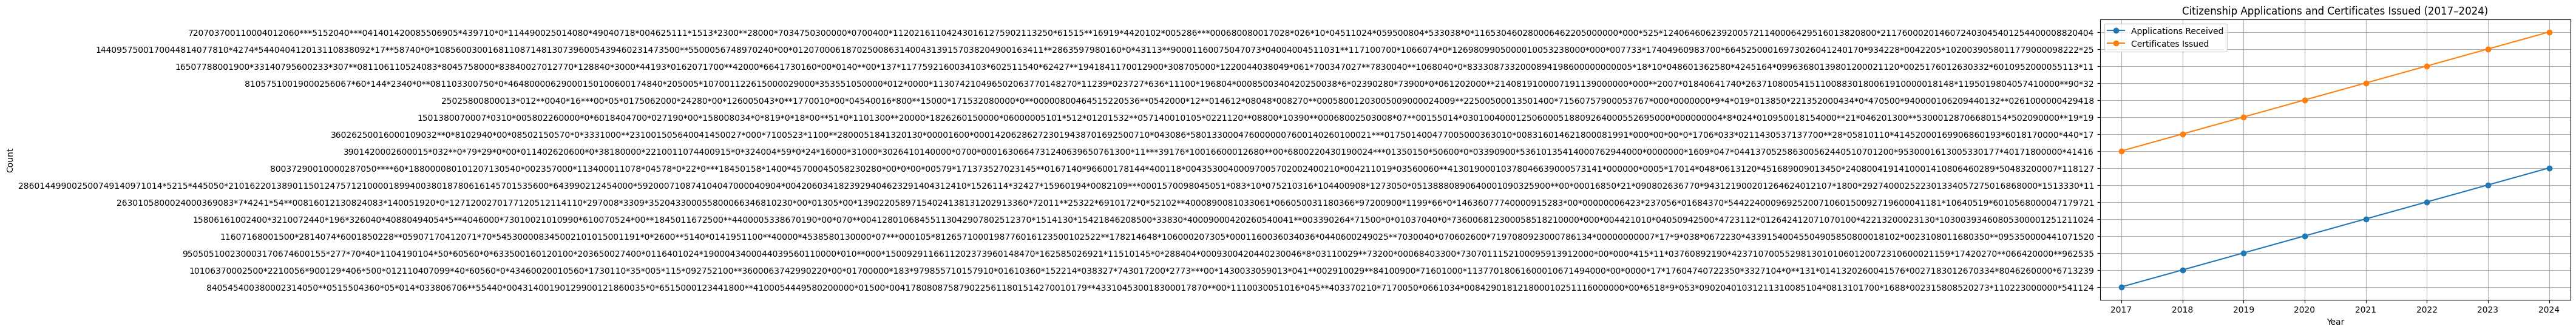

In [146]:
# Plot total applications received and issued by year
plt.figure(figsize=(10, 6))
plt.plot(years, total_received_by_year, label='Applications Received', marker='o')
plt.plot(years, total_issued_by_year, label='Certificates Issued', marker='o')
plt.title('Citizenship Applications and Certificates Issued (2017–2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
# Ensure the Total column is numeric
received_data['Total'] = pd.to_numeric(received_data['Total'], errors='coerce')

# Use nlargest to get the top 5 nationalities
top_nationalities = received_data.nlargest(5, 'Total')

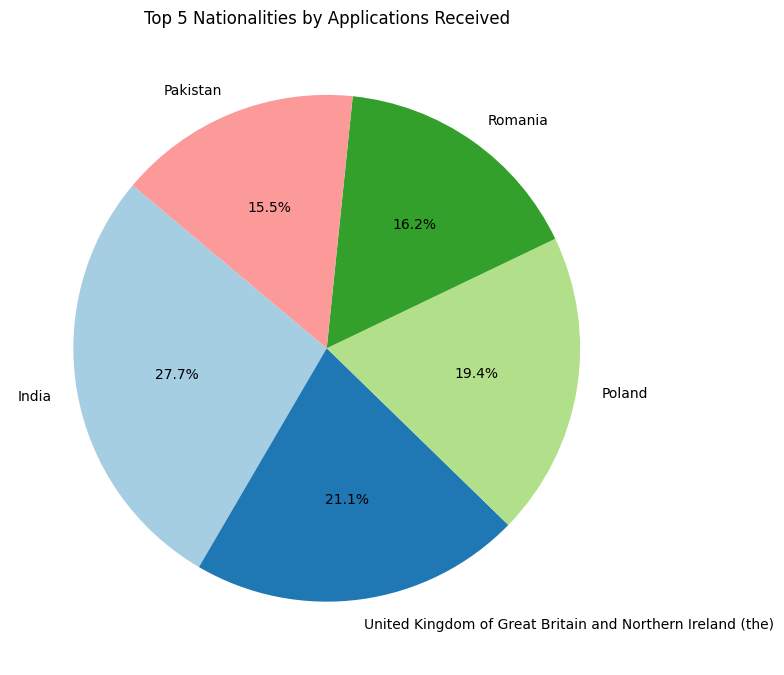

In [148]:
# Pie chart for top nationalities
plt.figure(figsize=(8, 8))
plt.pie(
    top_nationalities['Total'],
    labels=top_nationalities['Nationality'],
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Start angle for better visual balance
    colors=plt.cm.Paired.colors  # Use a color map for variety
)

plt.title('Top 5 Nationalities by Applications Received')
plt.tight_layout()
plt.show()

In [149]:
# Check for rows with missing data
missing_data_rows = data[data.isnull().any(axis=1)]
print("Rows with Missing Data:")
print(missing_data_rows)

Rows with Missing Data:
Empty DataFrame
Columns: [Type, Status, Last Updated, Nationality, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Index: []


In [150]:
# Fill or remove missing values if necessary
data.fillna(0, inplace=True)

In [151]:
# Example insights
print("Key Insights:")
print(f"Total applications received between 2017 and 2024: {total_received_by_year.sum()}")
print(f"Total certificates issued between 2017 and 2024: {total_issued_by_year.sum()}")
print(f"Top nationality requesting citizenship: {top_nationalities.iloc[0]['Nationality']}")

Key Insights:
Total applications received between 2017 and 2024: 840545400380002314050**0515504360*05*014*033806706**55440*00431400190129900121860035*0*6515000123441800**4100054449580200000*01500*0041780808758790225611801514270010179**433104530018300017870**00*1110030051016*045**403370210*7170050*0661034*008429018121800010251116000000*00*6518*9*053*09020401031211310085104*0813101700*1688*002315808520273*110223000000*54112410106370002500*2210056*900129*406*500*012110407099*40*60560*0*43460020010560*1730110*35*005*115*092752100**3600063742990220*00*01700000*183*979855710157910*01610360*152214*038327*743017200*2773***00*1430033059013*041**002910029**84100900*71601000*11377018061600010671494000*00*0000*17*17604740722350*3327104*0**131*0141320260041576*0027183012670334*8046260000*6713239950505100230003170674600155*277*70*40*1104190104*50*60560*0*633500160120100*203650027400*0116401024*1900043400044039560110000*010**000*1500929116611202373960148470*162585026921*11510145*0*288404*000930042044

In [152]:
# Save cleaned data to a new CSV
data.to_csv("cleaned_citizenship_data.csv", index=False)

# Save visualizations (if necessary)
plt.savefig("citizenship_trends.png")

<Figure size 640x480 with 0 Axes>

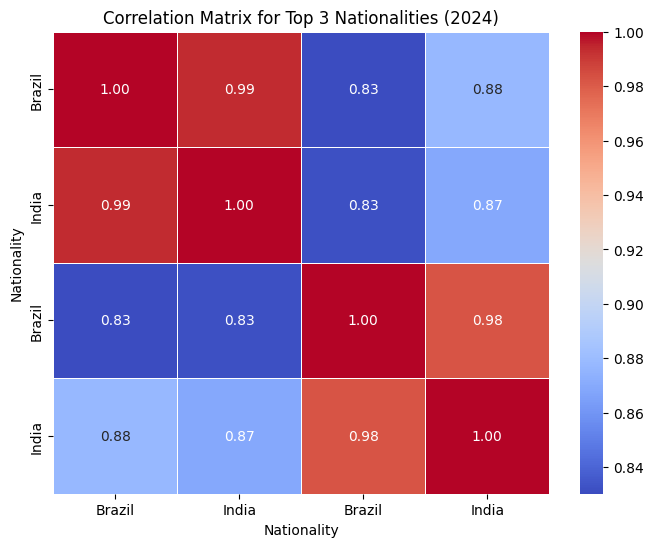

Correlation Matrix:
Nationality    Brazil     India    Brazil     India
Nationality                                        
Brazil       1.000000  0.993911  0.830229  0.877714
India        0.993911  1.000000  0.831557  0.869263
Brazil       0.830229  0.831557  1.000000  0.982697
India        0.877714  0.869263  0.982697  1.000000


In [153]:
# Filter data for the year 2024
year_2024_data = data[['Nationality', '2024']].copy()

# Convert '2024' column to numeric if it's not already
year_2024_data['2024'] = pd.to_numeric(year_2024_data['2024'], errors='coerce')

# Drop rows with NaN values
year_2024_data = year_2024_data.dropna()

# Identify the top 3 nationalities in 2024
top_3_nationalities = year_2024_data.nlargest(3, '2024')

# Extract data for these top 3 countries across years (assuming `years` contains the list of all year columns)
years = [str(year) for year in range(2017, 2025)]
top_3_data = data[data['Nationality'].isin(top_3_nationalities['Nationality'])][['Nationality'] + years]

# Set 'Nationality' as the index for correlation analysis
top_3_data = top_3_data.set_index('Nationality')

# Convert all year columns to numeric
top_3_data[years] = top_3_data[years].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = top_3_data.T.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Top 3 Nationalities (2024)')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
